In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"; # for GPU 1.

import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import  Pool
from functools import partial
import numpy as np
import pickle
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling1D

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
f=open('dataTrain_2.pk', 'rb')
train_data = pickle.load(f)
f.close()
f=open('dataValid_2.pk', 'rb')
valid_data = pickle.load(f)
f.close()

In [3]:
X_train= np.array([x for x in train_data['resizeDenoise'].values])
X_valid= np.array([x for x in valid_data['resizeDenoise'].values])

In [4]:
Y_train= np.array([y for y in train_data['classID'].values])
Y_valid= np.array([y for y in valid_data['classID'].values])

In [5]:
train_data = None
valid_data = None

In [6]:
numCols = X_train.shape[1]
print(numCols)

89009


In [7]:
def createModel():
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape = (numCols,1)))
    model.add(MaxPooling1D(pool_size= 2))
    model.add(Dropout(0.2))

    model.add(Conv1D(128, 2,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(256, 2,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(256, 2,activation='relu'))
#     model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size= 2))
#     model.add(Dropout(0.25))
    
#     model.add(Conv1D(512,2, activation='relu'))
#     model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [13]:
model = createModel()
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

# Display model architecture summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 89007, 32)         128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 44503, 32)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 44503, 32)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 44502, 128)        8320      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 22251, 128)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22251, 128)        0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 22250, 256)       

In [14]:
from tensorflow.keras.utils import to_categorical

X_train_r = X_train.reshape(X_train.shape[0], numCols, 1)
X_valid_r = X_valid.reshape(X_valid.shape[0], numCols, 1)
Y_train_r = to_categorical(Y_train)
Y_valid_r = to_categorical(Y_valid)

In [15]:
history = model.fit(X_train_r,
                      Y_train_r,
                      validation_data = (X_valid_r, 
                      Y_valid_r),
                      batch_size=12,
                      epochs=20)

Train on 6286 samples, validate on 1572 samples
Epoch 1/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 2.1977 - acc: 0.1726 - val_loss: 2.2028 - val_acc: 0.1469
Epoch 2/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 2.0992 - acc: 0.2192 - val_loss: 2.0819 - val_acc: 0.2449
Epoch 3/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 1.9921 - acc: 0.2628 - val_loss: 2.1258 - val_acc: 0.2188
Epoch 4/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 1.8507 - acc: 0.3366 - val_loss: 2.1203 - val_acc: 0.2354
Epoch 5/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 1.6727 - acc: 0.4104 - val_loss: 2.1430 - val_acc: 0.2487
Epoch 6/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 1.4471 - acc: 0.4983 - val_loss: 2.2406 - val_acc: 0.2805
Epoch 7/20
6286/6286 [==============================] - 117s 19ms/sample - loss: 1.2799 - acc: 0.5810 - val_loss: 2.58

In [16]:
f=open('dataTest_2.pk', 'rb')
test_data = pickle.load(f)
f.close()

In [18]:
X_test= np.array([x for x in test_data['resizeDenoise'].values])
Y_test= np.array([y for y in test_data['classID'].values])
X_test_r = X_test.reshape(X_test.shape[0], numCols, 1)

In [19]:
pred = model.predict(X_test_r)

In [20]:
label_names = ['air_conditioner','car_horn', 'children_playing', 'dog_bark', 
               'drilling', 'engine_idling', 'gun_shot', 'jackhammer','siren','street_music']

In [21]:
import sklearn.metrics as metrics
predout = np.argmax(pred, axis=1)
testout = Y_test
print("Test result: ")
print('Batch size is:', 12)

testScores = metrics.accuracy_score(testout, predout)
confusion = metrics.confusion_matrix(testout, predout)
print("Best accuracy (on test data set): %.2f%%" % (testScores * 100))
print(metrics.classification_report(testout, predout, labels=[0,1,2,3,4,5,6,7,8,9],target_names=label_names, digits=4))
print(confusion)

Test result: 
Batch size is: 12
Best accuracy (on test data set): 24.37%
                  precision    recall  f1-score   support

 air_conditioner     0.3433    0.2347    0.2788        98
        car_horn     0.1212    0.2162    0.1553        37
children_playing     0.1810    0.2100    0.1944       100
        dog_bark     0.2857    0.3232    0.3033        99
        drilling     0.2000    0.1111    0.1429       108
   engine_idling     0.5714    0.1250    0.2051        96
        gun_shot     0.6875    0.6471    0.6667        34
      jackhammer     0.2189    0.4190    0.2876       105
           siren     0.1605    0.1512    0.1557        86
    street_music     0.2203    0.2342    0.2271       111

        accuracy                         0.2437       874
       macro avg     0.2990    0.2672    0.2617       874
    weighted avg     0.2810    0.2437    0.2393       874

[[23  3 18  6  9  1  0 27  5  6]
 [ 2  8  4  2  2  1  5  8  1  4]
 [ 6  5 21 15  8  0  1 14 17 13]
 [ 1 10 15 32

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


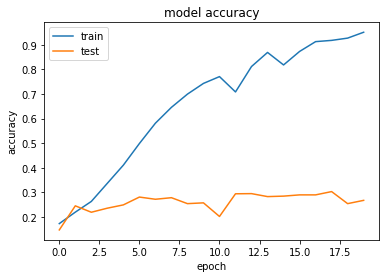

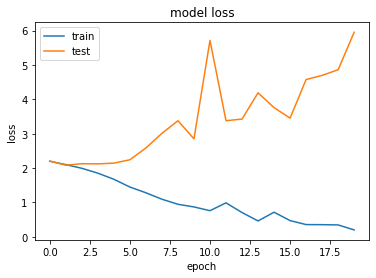

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()